Time taken for Map Coloring: 43.7649929523468


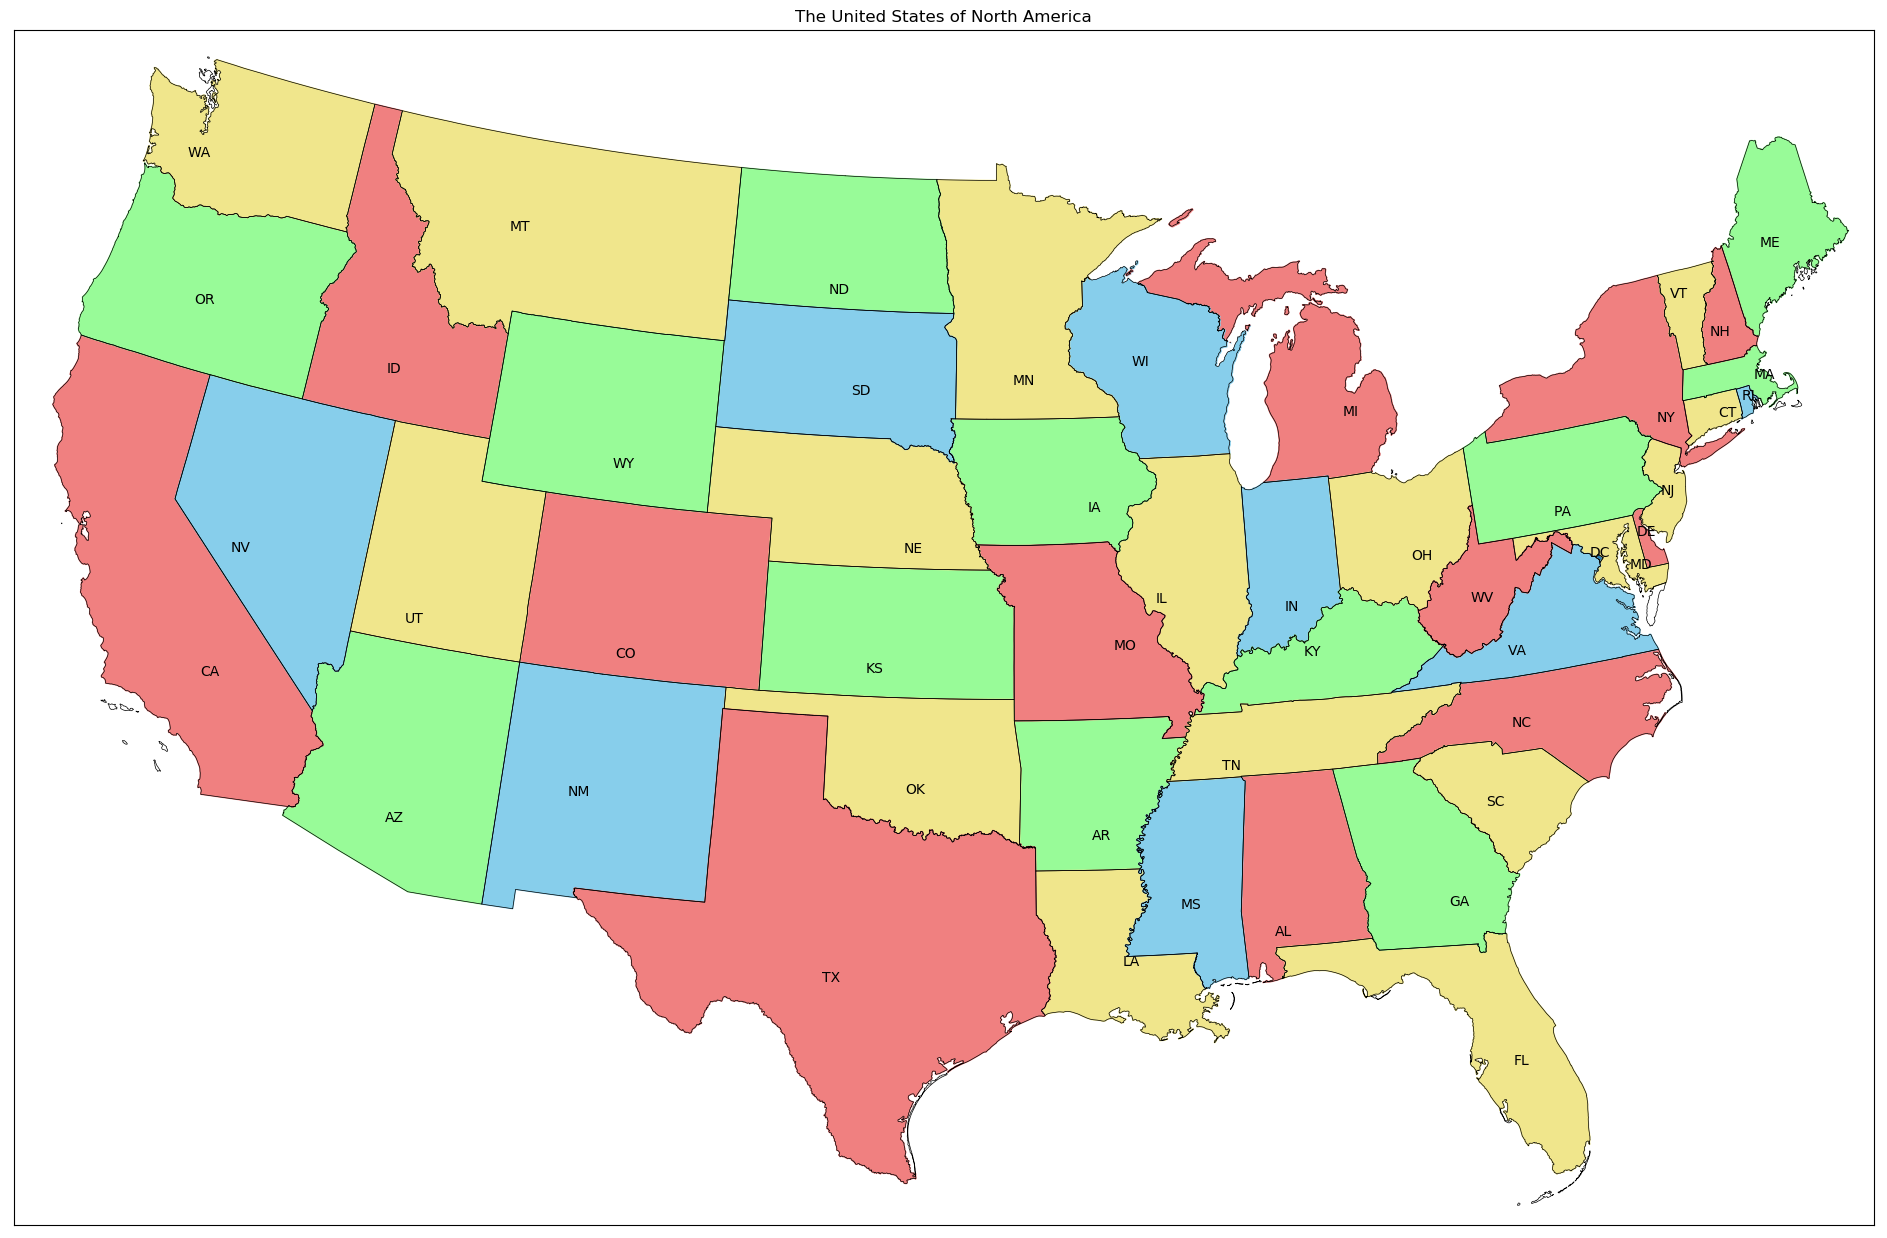

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
import random
import json
import time
from IPython import display
from matplotlib.collections import PatchCollection
import numpy as np
from scipy.spatial import ConvexHull
import time

# Python program for solution of M Coloring 
# problem using backtracking 

stateDictionary = {}
colorDictionary = {"1":"lightcoral", "2":"palegreen", "3":"khaki", "4":"skyblue"}
ResultDictionary = {}
DomainDictionary = {}

class Graph(): 

	def __init__(self, vertices): 
		self.V = vertices 
		self.graph = [[0 for column in range(vertices)]
							for row in range(vertices)] 

	## heuristic functions
	def MRV(self, domainDictionary, colours):
		LeastRemainingValuesStates = {0:[],1:[],2:[],3:[],4:[]}

		for key, value in domainDictionary.items():
			if len(value)==0 and colours[key-1] == 0:
				LeastRemainingValuesStates[0].append(key-1)

			elif(len(value)==1 and colours[key-1]==0):
				LeastRemainingValuesStates[1].append(key-1)

			elif(len(value)==2 and colours[key-1]==0):
				LeastRemainingValuesStates[2].append(key-1)

			elif(len(value)==3 and colours[key-1]==0):
				LeastRemainingValuesStates[3].append(key-1)

			elif(len(value)==4 and colours[key-1]==0):
				LeastRemainingValuesStates[4].append(key-1)

		if len(LeastRemainingValuesStates[0])>0:
			return LeastRemainingValuesStates[0]

		elif len(LeastRemainingValuesStates[1])>0:
			return LeastRemainingValuesStates[1]

		elif len(LeastRemainingValuesStates[2])>0:
			return LeastRemainingValuesStates[2]

		elif len(LeastRemainingValuesStates[3])>0:
			return LeastRemainingValuesStates[3]
		else:
			return LeastRemainingValuesStates[4]


	def DegreeConstraint(self, domainDictionary, colours):
		MaximumDegreeConstraint = 0
		MaximumDC_State = -1

		for v in range(self.V): 
			if colours[v]!=0:
				continue
			temp = 0
			for i in range(self.V):
				if self.graph[v][i] == 1:
					temp = temp + 1
			if temp > MaximumDegreeConstraint:
				MaximumDegreeConstraint = temp
				MaximumDC_State = v
		return MaximumDC_State


	def LCV(self, domainDictionary, colours):
		MinimumDegreeConstraint = 0
		MinimumDC_State = -1

		for v in range(self.V): 
			if colours[v]!=0:
				continue
			temp = 0
			for i in range(self.V):
				if self.graph[v][i] == 0:
					temp = temp + 1
			if temp > MinimumDegreeConstraint:
				MinimumDegreeConstraint = temp
				MinimumDC_State = v

		return MinimumDC_State

	def getTheNextState(self, domainDictionary, colours):
		NextState = 0

		nextMRVStates = self.MRV(domainDictionary, colours)
		nextDCStates = self.DegreeConstraint(domainDictionary, colours)
		nextLCVStates = self.LCV(domainDictionary, colours)
		
		if (len(nextMRVStates)==1):
			NextState = nextMRVStates[0]
		elif(nextDCStates!=-1):
			NextState = nextDCStates
		else:
			NextState = nextLCVStates

		return NextState



	# A utility function to check if the current color assignment 
	# is safe for vertex v 
	def isSafe(self, v, colour, c): 
		for i in range(self.V): 
			if self.graph[v][i] == 1 and colour[i] == c: 
				return False
		return True
	
	def getTheNeighbors(self, state):
		listofneighbors = []
		for i in range(self.V):
			if self.graph[state][i] == 1:
				listofneighbors.append(i)
		return listofneighbors


	#singleton methods
	def checkIfAllStatesColored(self, colors):
		numberofvertices = 0

		for color in colors:
			if color != 0:
				numberofvertices = numberofvertices + 1

		# check if all states has been assigned.
		if numberofvertices == 50:
			return True
		else:
			return False

	def checkSingletonConstraints(self, v):
		if self.checkIfAllStatesColored(colour): ## break condition to check if all states colored or not. 
				return True
		if v == self.V:  ## just to check if we have reached 50th end state.
				v = random.choice([a for a in range(len(colour)) if colour[a] == 0])

	def SingletonRemoveDomainVariables(self, v):
		## code to remove the color from the domain dictionary from the current state
		if c in DomainDictionary[v+1]:
			DomainDictionary[v+1].remove(c)

		## revert back the original domain variable current state color
		if c not in DomainDictionary[v+1]:
			DomainDictionary[v+1].append(c)
			DomainDictionary[v+1].sort()


	def SingletonHeartLogic(self, listofsingletonstates):
		if len(listofsingletonstates)==0:
			return
		stateToColor = -1
		## code to return the singleton state.
		for key,value in DomainDictionary.items():
			if len(value) == 1 and colour[key-1] == 0:
				stateToColor = key
				break
					
		## if there is no singleton state pass the v+1.
		if stateToColor == -1:
			## select one random state from the uncolored.
			current = random.choice([a for a in range(len(colour)) if colour[a] == 0])
			if self.graphColourUtil(m, colour, current) == True:
				return True
		else: ## if there is singleton state pass that singleton state.
			if self.graphColourUtil(m, colour, stateToColor-1) == True:
				return True

	# A recursive utility function to solve m 
	# coloring problem 
	def graphColourUtil(self, m, colour, v):
		try:
			if self.checkIfAllStatesColored(colour):
				return True
			if v == self.V:  ## just to check if we have reached 50th end state.
				return True

			## singleton logic. 
			listof_singleton_states = list(range(self.V%50))
			## core logic for singleton
			self.SingletonHeartLogic(listof_singleton_states)

			if not DomainDictionary[v+1]: ## check if the domain has no colors in their domain variables. if it is empty return false
				return False

			for c in DomainDictionary[v+1]:
				if self.isSafe(v, colour, c) == True:
					colour[v] = c ## assign the color to that state
					neighbors = self.getTheNeighbors(v) ## get the neighbors of the current state.

					# code to remove colors in its neighboring states
					for neighbor in neighbors:
						if c in DomainDictionary[neighbor+1]:
							DomainDictionary[neighbor+1].remove(c) ## remove the color from the neighbor domain list

					Nextstate = self.getTheNextState(DomainDictionary, colour)
					if Nextstate != -1:
						if self.graphColourUtil(m, colour, Nextstate) == True:
							return True
					else:
						if self.graphColourUtil(m, colour, v+1) == True:
							return True

					# revert the domain values of all current neighbors
					for neighbor in neighbors:
						a = neighbor+1
						if c not in DomainDictionary[a]:
							DomainDictionary[a].append(c) ## remove the color from the neighbor domain list
							DomainDictionary[a].sort()
					colour[v] = 0
		except Exception as e:
			print("something wrong", e)

	def graphColouring(self, m): 
		colour = [0] * self.V 
		if self.graphColourUtil(m, colour, 0) == False: 
			return False

		# Print the solution 
		print("Solution exist and Following are the assigned colours:")
		for idx, val in enumerate(colour): 
			 ResultDictionary[stateDictionary[str(idx+1)]] = colorDictionary[str(val)]
		return True

def map_coloring():
    #plt.figure(figsize=(18,12))
    fig=plt.figure(figsize=(24, 20), dpi= 100, facecolor='w', edgecolor='k')
    
    # create the map
    map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

    # load the shapefile, use the name 'states'
    map.readshapefile('/Users/amitshetty/Downloads/basemap-1.1.0/examples/st99_d00', name='states', drawbounds=True)
    # Amit
    
    short_state_names = {
        #'Alaska':'AK',
        'Alabama':'AL',
        'Arkansas':'AR',
        'American Samoa':'AS',
        'Arizona':'AZ',
        'California':'CA',
        'Colorado':'CO',
        'Connecticut':'CT',
        'District of Columbia':'DC',
        'Delaware':'DE',
        'Florida':'FL',
        'Georgia':'GA',
        'Guam':'GU',
        #'Hawaii':'HI',
        'Iowa':'IA',
        'Idaho':'ID',
        'Illinois':'IL',
        'Indiana':'IN',
        'Kansas':'KS',
        'Kentucky':'KY',
        'Louisiana':'LA',
        'Massachusetts':'MA',
        'Maryland':'MD',
        'Maine':'ME',
        'Michigan':'MI',
        'Minnesota':'MN',
        'Missouri':'MO',
        'Northern Mariana Islands':'MP',
        'Mississippi':'MS',
        'Montana':'MT',
        'North Carolina':'NC',
        'North Dakota':'ND',
        'Nebraska':'NE',
        'New Hampshire':'NH',
        'New Jersey':'NJ',
        'New Mexico':'NM',
        'Nevada':'NV',
        'New York':'NY',
        'Ohio':'OH',
        'Oklahoma':'OK',
        'Oregon':'OR',
        'Pennsylvania':'PA',
        #'Puerto Rico':'PR',
        'Rhode Island':'RI',
        'South Carolina':'SC',
        'South Dakota':'SD',
        'Tennessee':'TN',
        'Texas':'TX',
        'Utah':'UT',
        'Virginia':'VA',
        'Virgin Islands':'VI',
        'Vermont':'VT',
        'Washington':'WA',
        'Wisconsin':'WI',
        'West Virginia':'WV',
        'Wyoming':'WY'
    }

    printed_names = []
    mi_index = 0
    wi_index = 0
    for shapedict,state in zip(map.states_info, map.states):
        draw_state_name = True
        short_name = short_state_names.get(shapedict['NAME'])
        if short_name in printed_names and short_name not in ['MI', 'WI']: 
            continue
        if short_name == 'MI':
            if mi_index != 3:
                draw_state_name = False
            mi_index += 1
        if short_name == 'WI':
            if wi_index != 2:
                draw_state_name = False
            wi_index += 1
        # center of polygon
        x, y = np.array(state).mean(axis=0)
        hull = ConvexHull(state)
        hull_points = np.array(state)[hull.vertices]
        #center of convex hull over the polygon points
        x, y = hull_points.mean(axis=0)
        if draw_state_name:
            # You have to align x,y manually to avoid overlapping for little states
            plt.text(x+.1, y, short_name, ha="center")
        printed_names += [short_name,] 
    plt.title('The United States of North America')
    #plt.show()
    
    # Amit
    
    # collect the state names from the shapefile attributes so we can
    # look up the shape obect for a state by it's name
    state_names = []
    for shape_dict in map.states_info:
        state_names.append(shape_dict['NAME'])

    ax = plt.gca() # get current axes instance
    
    patches = []
    for info, shape in zip(map.states_info,map.states):
        if info['NAME'] == 'Michigan':
            color_for_unique_borders = ResultDictionary.get('Michigan')
            patches.append(Polygon(np.array(shape), True))
            ax.add_collection(PatchCollection(patches, facecolor= color_for_unique_borders, edgecolor=color_for_unique_borders))
            display.display(plt.gcf())
            display.clear_output(wait=True)
        elif info['NAME'] == 'Wisconsin':
            patches.clear()
            color_for_unique_borders = ResultDictionary.get('Wisconsin')
            patches.append(Polygon(np.array(shape), True))
            ax.add_collection(PatchCollection(patches, facecolor= color_for_unique_borders, edgecolor=color_for_unique_borders))
            display.display(plt.gcf())
            display.clear_output(wait=True)
#         elif info['NAME'] == 'Alaska':
#         # Alaska is too big. Scale it down to 35% first, then transate it. 
#             seg = list(map(lambda x,y : (0.35*x + 1100000, 0.35*y-1300000), shape))
#             poly = Polygon(seg,facecolor='orange',edgecolor='orange')
#             ax.add_patch(poly)
#         elif info['NAME'] == 'Hawaii':
#             seg = list(map(lambda x,y : (x + 5100000, y-900000), shape))
#             poly = Polygon(seg,facecolor='violet',edgecolor='violet')
#             ax.add_patch(poly)
            
    for state_name in sorted(set(state_names)):
        # color_for_state = random.choice(colors)
        if state_name not in ['Wisconsin','Michigan']:
            color_for_state = ResultDictionary.get(state_name)
            seg = map.states[state_names.index(state_name)]
            poly = Polygon(seg, facecolor=color_for_state,edgecolor=color_for_state)
            ax.add_patch(poly)
            display.display(plt.gcf())
            display.clear_output(wait=True)
            #time.sleep(1)

def createdomainDictionary():
	for key, value in enumerate(stateDictionary):
		listofintegers = list(range(1,5))
		DomainDictionary[key+1] = listofintegers
        
def main():
    stateDictionary["1"] = "Alabama"
    stateDictionary["2"] = "Alaska"
    stateDictionary["3"] = "Arizona"
    stateDictionary["4"] = "Arkansas"
    stateDictionary["6"] = "Colorado"
    stateDictionary["5"] = "California"
    stateDictionary["7"] = "Connecticut"
    stateDictionary["8"] = "Delaware"
    stateDictionary["9"] = "Florida"
    stateDictionary["10"] = "Georgia"
    stateDictionary["11"] = "Hawaii"
    stateDictionary["12"] = "Idaho"
    stateDictionary["13"] = "Illinois"
    stateDictionary["14"] = "Indiana"
    stateDictionary["15"] = "Iowa"
    stateDictionary["16"] = "Kansas"
    stateDictionary["17"] = "Kentucky"
    stateDictionary["18"] = "Louisiana"
    stateDictionary["19"] = "Maine"
    stateDictionary["20"] = "Maryland"
    stateDictionary["21"] = "Massachusetts"
    stateDictionary["22"] = "Michigan"
    stateDictionary["23"] = "Minnesota"
    stateDictionary["24"] = "Mississippi"
    stateDictionary["25"] = "Missouri"
    stateDictionary["26"] = "Montana"
    stateDictionary["27"] = "Nebraska"
    stateDictionary["28"] = "Nevada"
    stateDictionary["29"] = "New Hampshire"
    stateDictionary["30"] = "New Jersey"
    stateDictionary["31"] = "New Mexico"
    stateDictionary["32"] = "New York"
    stateDictionary["33"] = "North Carolina"
    stateDictionary["34"] = "North Dakota"
    stateDictionary["35"] = "Ohio"
    stateDictionary["36"] = "Oklahoma"
    stateDictionary["37"] = "Oregon"
    stateDictionary["38"] = "Pennsylvania"
    stateDictionary["39"] = "Rhode Island"
    stateDictionary["40"] = "South Carolina"
    stateDictionary["41"] = "South Dakota"
    stateDictionary["42"] = "Tennessee"
    stateDictionary["43"] = "Texas"
    stateDictionary["44"] = "Utah"
    stateDictionary["45"] = "Vermont"
    stateDictionary["46"] = "Virginia"
    stateDictionary["47"] = "Washington"
    stateDictionary["48"] = "West Virginia"
    stateDictionary["49"] = "Wisconsin"
    stateDictionary["50"] = "Wyoming"
    # create the state and integer mapping dictionary
    #createStateDictionary()
    
    createdomainDictionary()
    
    # Driver Code 
    g = Graph(50) #number of states 48

    g.graph =  [[0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0], 
		   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
		   [0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0],
		   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0],
		   [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
		   [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
		   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
		   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
		   [1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
		   [1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0],
		   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], 
		   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1],
		   [0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0],
		   [0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
		   [0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0],
		   [0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
		   [0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0],
		   [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
		   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
		   [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0],
		   [0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0], 
		   [0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0],
		   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0],	  
		   [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0],
		   [0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0],		  
		   [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1],
		   [0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1],
		   [0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0],		
		   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],
		   [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
		   [0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0], 
		   [0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0],	
		   [0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0],
		   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
		   [0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0],
		   [0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],		  	   		   
		   [0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],
		   [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0],
		   [0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
		   [0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],		  	   		   
		   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
		   [1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], 
		   [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
		   [0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
		   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
		   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0],	  	   		   
		   [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
		   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0],
		   [0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
		   [0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0]] 

    m=4 ## chromataic number
    start = time.time()
    g.graphColouring(m)
    #end = time.time() 
    #print("Time taken for Backtracking: {}".format(str(end-start)))
    # Map Coloring and Animation Section
    #start = time.time()
    map_coloring()
    end = time.time()
    print("Time taken for Map Coloring: {}".format(str(end-start)))
    
#     for key, value in ResultDictionary.items():
#         print(key + " ==> " + value, end='\n')
    
if __name__ == "__main__":
    main()